# Problem Statement
Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the data
bank_data = pd.read_csv('bank-full.csv', sep=';')

In [3]:
bank_data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


#### EDA 

In [4]:
bank_data.shape

(45211, 17)

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
# Convert categorical variables to dummy variables
bank_data = pd.get_dummies(bank_data,  columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
bank_data.head(2)
# Changing the categorical value to numrical by creating dummies
bank_data['y']=bank_data['y'].replace('yes',1)
bank_data['y']=bank_data['y'].replace('no',0)
bank_data

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [8]:
# Remove irrelevant columns
bank_data.drop(['day', 'duration', 'campaign', 'pdays', 'previous'], axis=1, inplace=True)

In [9]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   y                    45211 non-null  int64
 3   job_admin.           45211 non-null  uint8
 4   job_blue-collar      45211 non-null  uint8
 5   job_entrepreneur     45211 non-null  uint8
 6   job_housemaid        45211 non-null  uint8
 7   job_management       45211 non-null  uint8
 8   job_retired          45211 non-null  uint8
 9   job_self-employed    45211 non-null  uint8
 10  job_services         45211 non-null  uint8
 11  job_student          45211 non-null  uint8
 12  job_technician       45211 non-null  uint8
 13  job_unemployed       45211 non-null  uint8
 14  job_unknown          45211 non-null  uint8
 15  marital_divorced     45211 non-null  uint8
 16  marital_married      4

In [10]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bank_data[['age', 'balance']] = scaler.fit_transform(bank_data[['age', 'balance']])


In [11]:
# Preview the preprocessed data
bank_data.head()

,age,balance,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [12]:
# Split the data into training and testing sets
X = bank_data.drop('y', axis=1)
y = bank_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Fit a logistic regression model to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [14]:
# Make predictions on the testing data
y_pred = logreg.predict(X_test)

In [15]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report=classification_report(y_test,y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion)
print('Classification Report \n',report)

Accuracy: 0.8901913081941834
Confusion matrix:
 [[7858   94]
 [ 899  192]]
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.67      0.18      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



In [16]:
df=pd.DataFrame({'actual':y_test,'prediction':y_pred})
df

,actual,prediction
3776,0,0
9928,0,0
33409,0,0
31885,0,0
15738,0,0
...,...,...
13353,0,0
38732,1,0
5654,0,0
3779,0,0


In [17]:
# Our accuracy = 0.891, which is greater than 0.5
# So [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
logreg.predict_proba(X_test)[:,1]

array([0.02063868, 0.09581305, 0.25649812, ..., 0.02889814, 0.01953694,
       0.06613888])

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

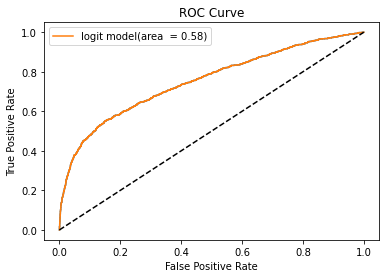

auc accuracy: 0.5820822045010668


In [21]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)
auc=roc_auc_score(y_test,y_pred)

plt.title('ROC Curve')
plt.plot(fpr,tpr,label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('auc accuracy:',auc)